In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=(250)

### Q.1 Delivery_time -> Predict delivery time using sorting time 

In [2]:
dt = pd.read_csv('delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Data Visualization and EDA

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

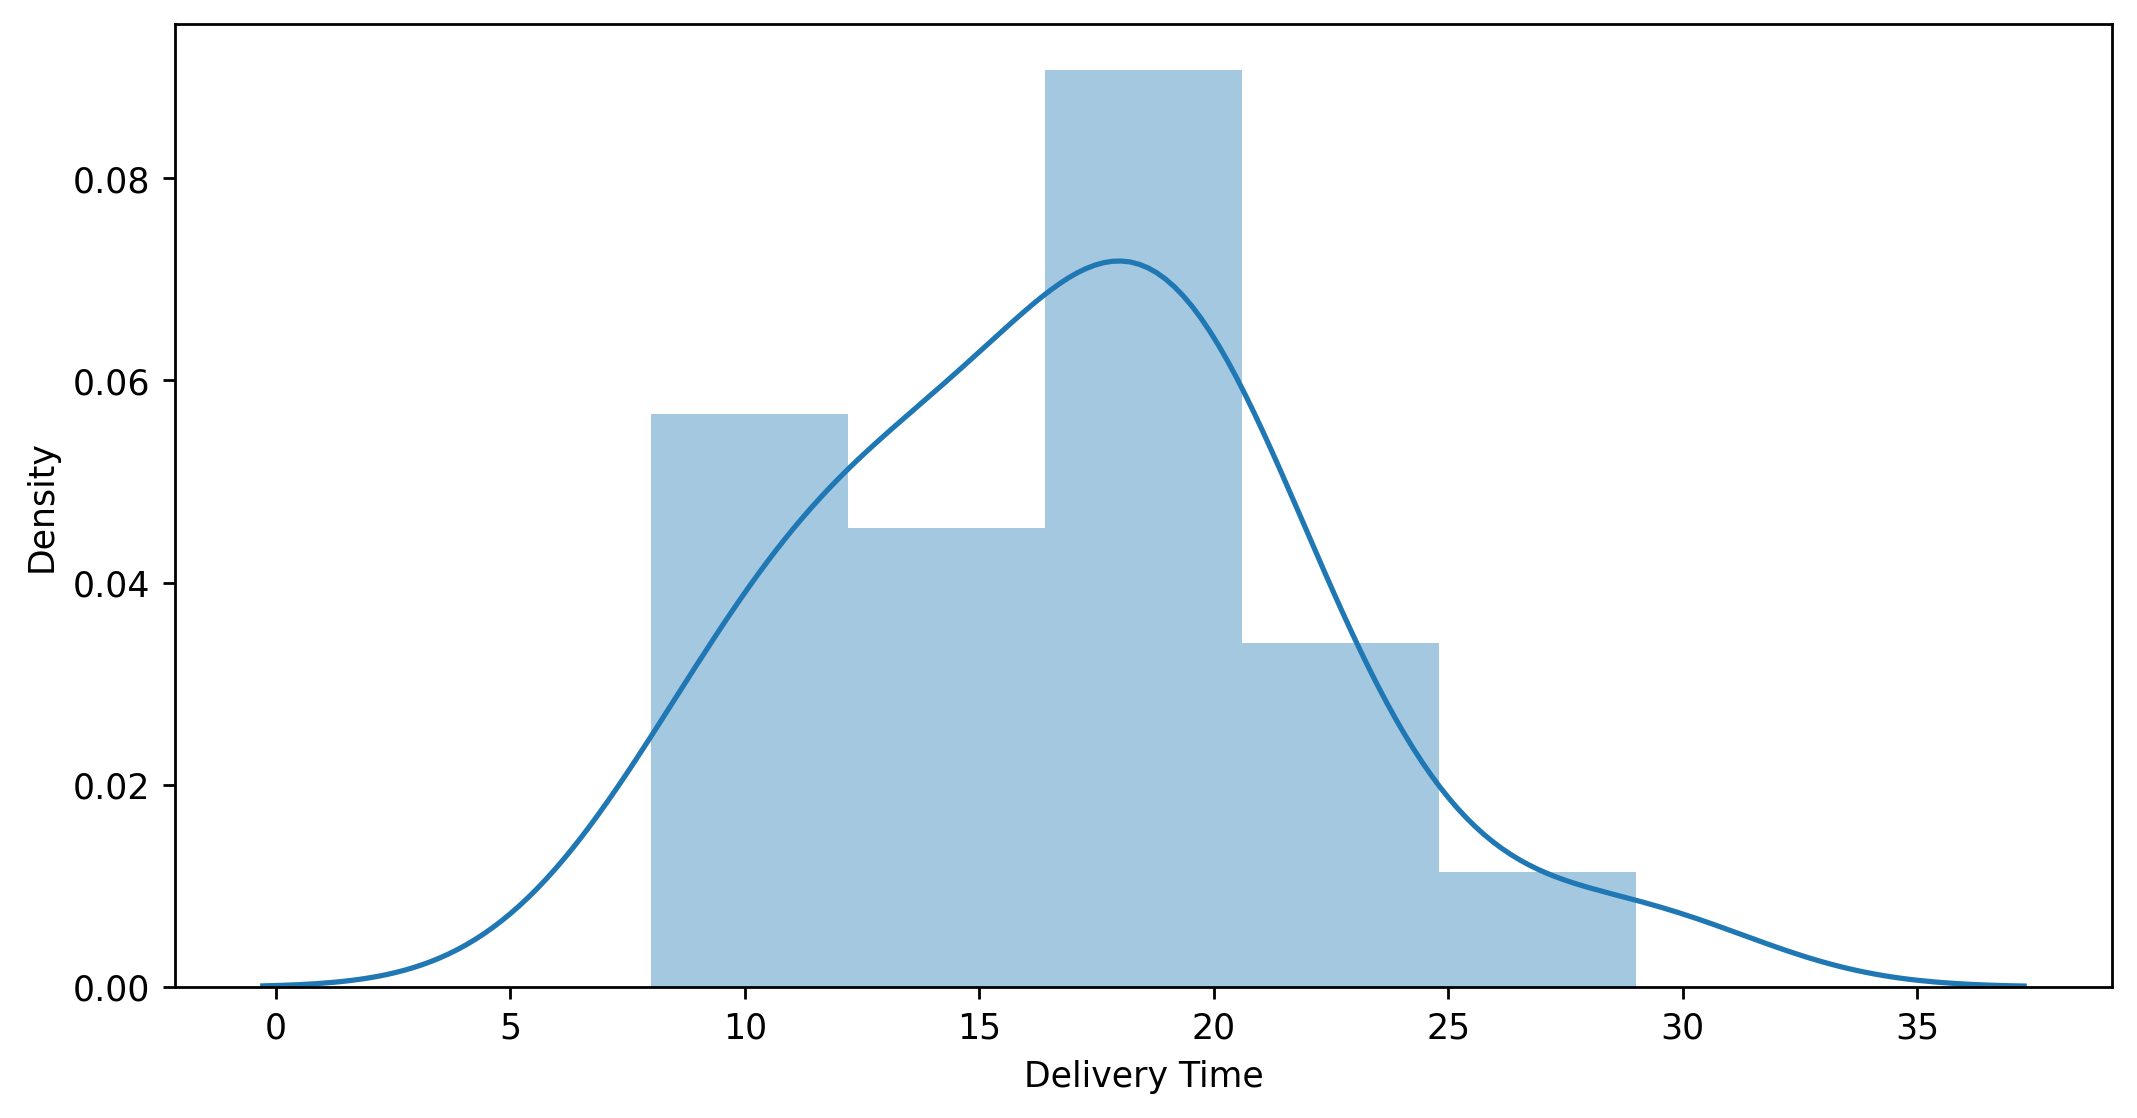

In [5]:
sns.distplot(dt['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

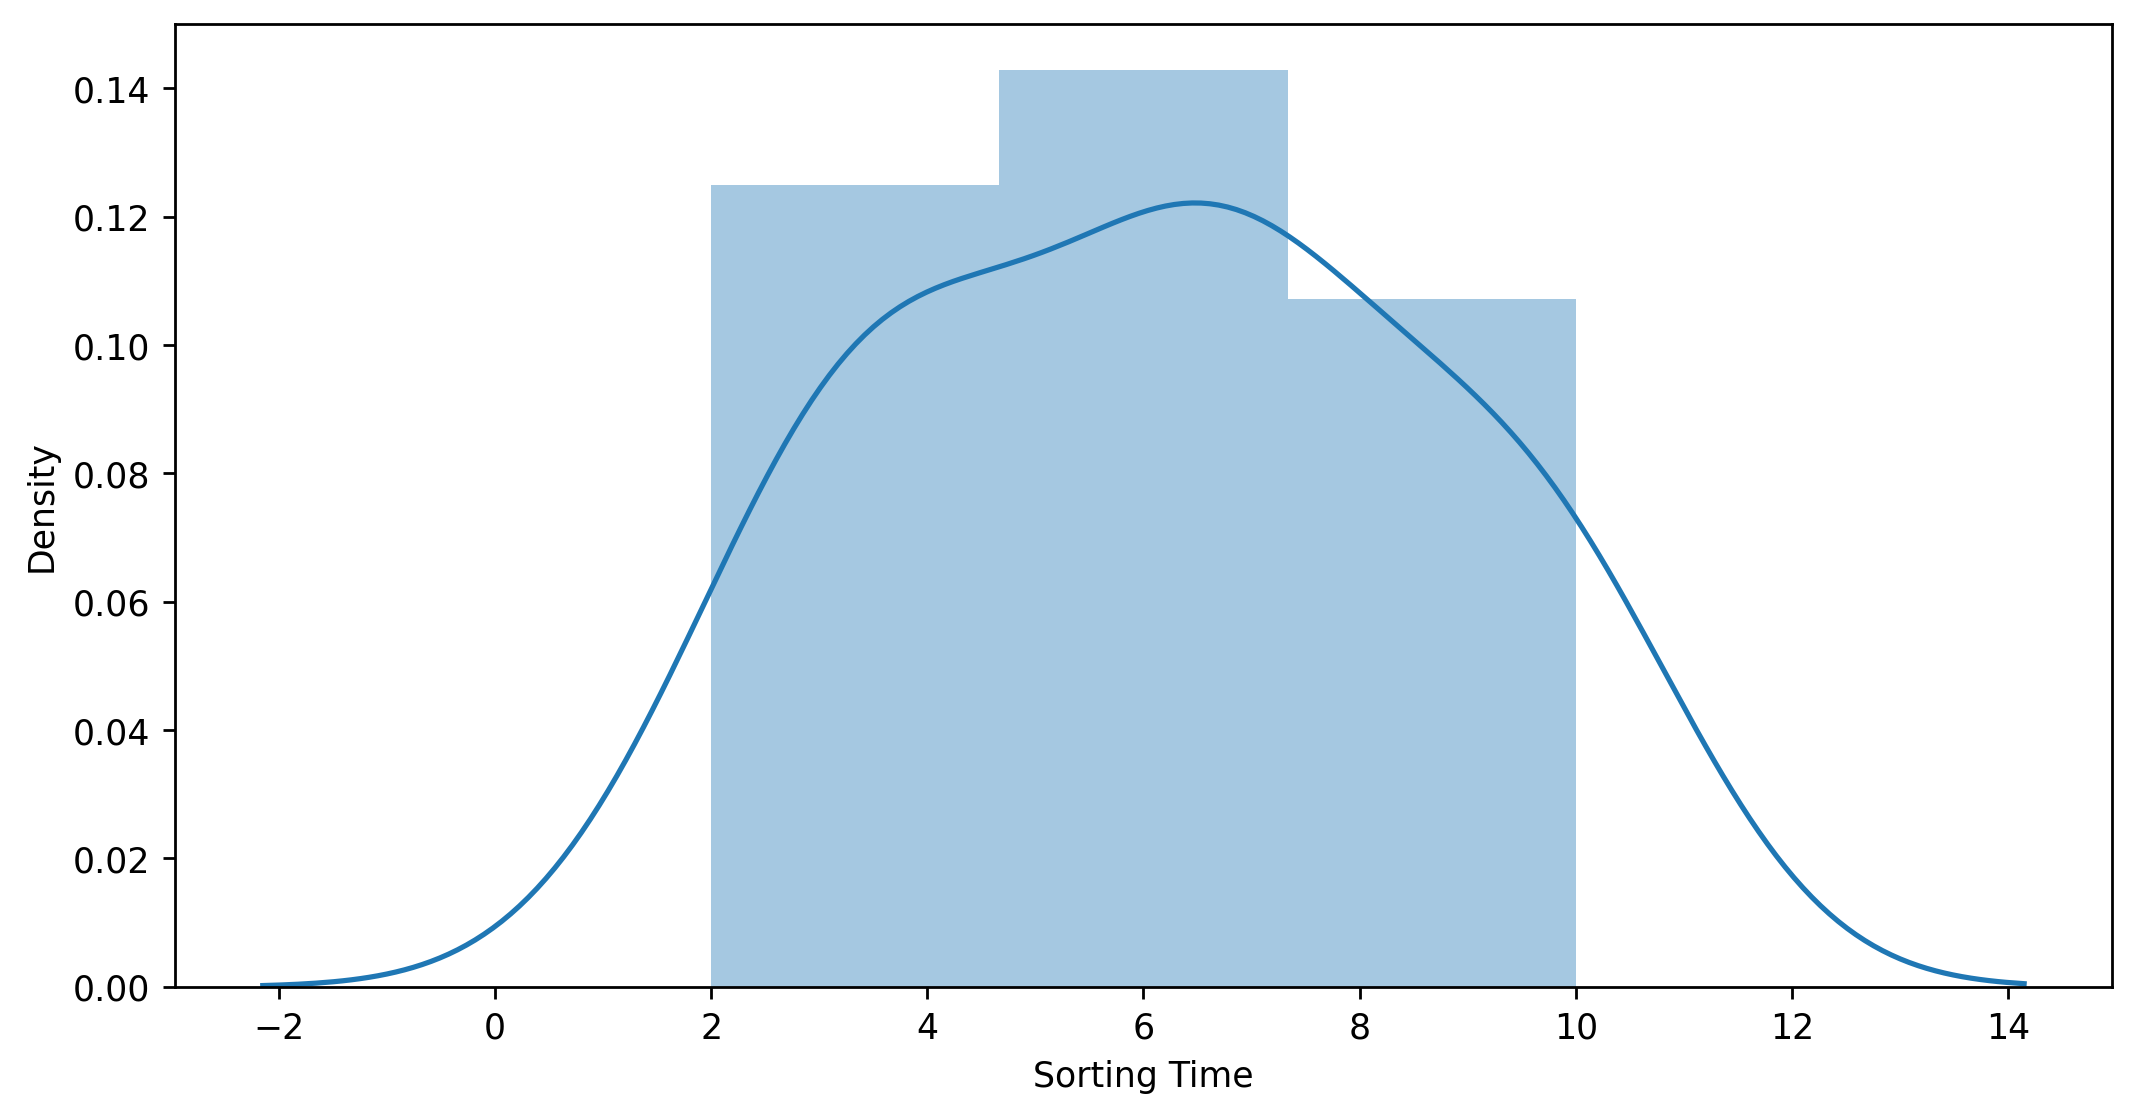

In [6]:
sns.distplot(dt['Sorting Time'])

# Feature Engineering

In [7]:
# Renaming Columns
df=dt.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [8]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

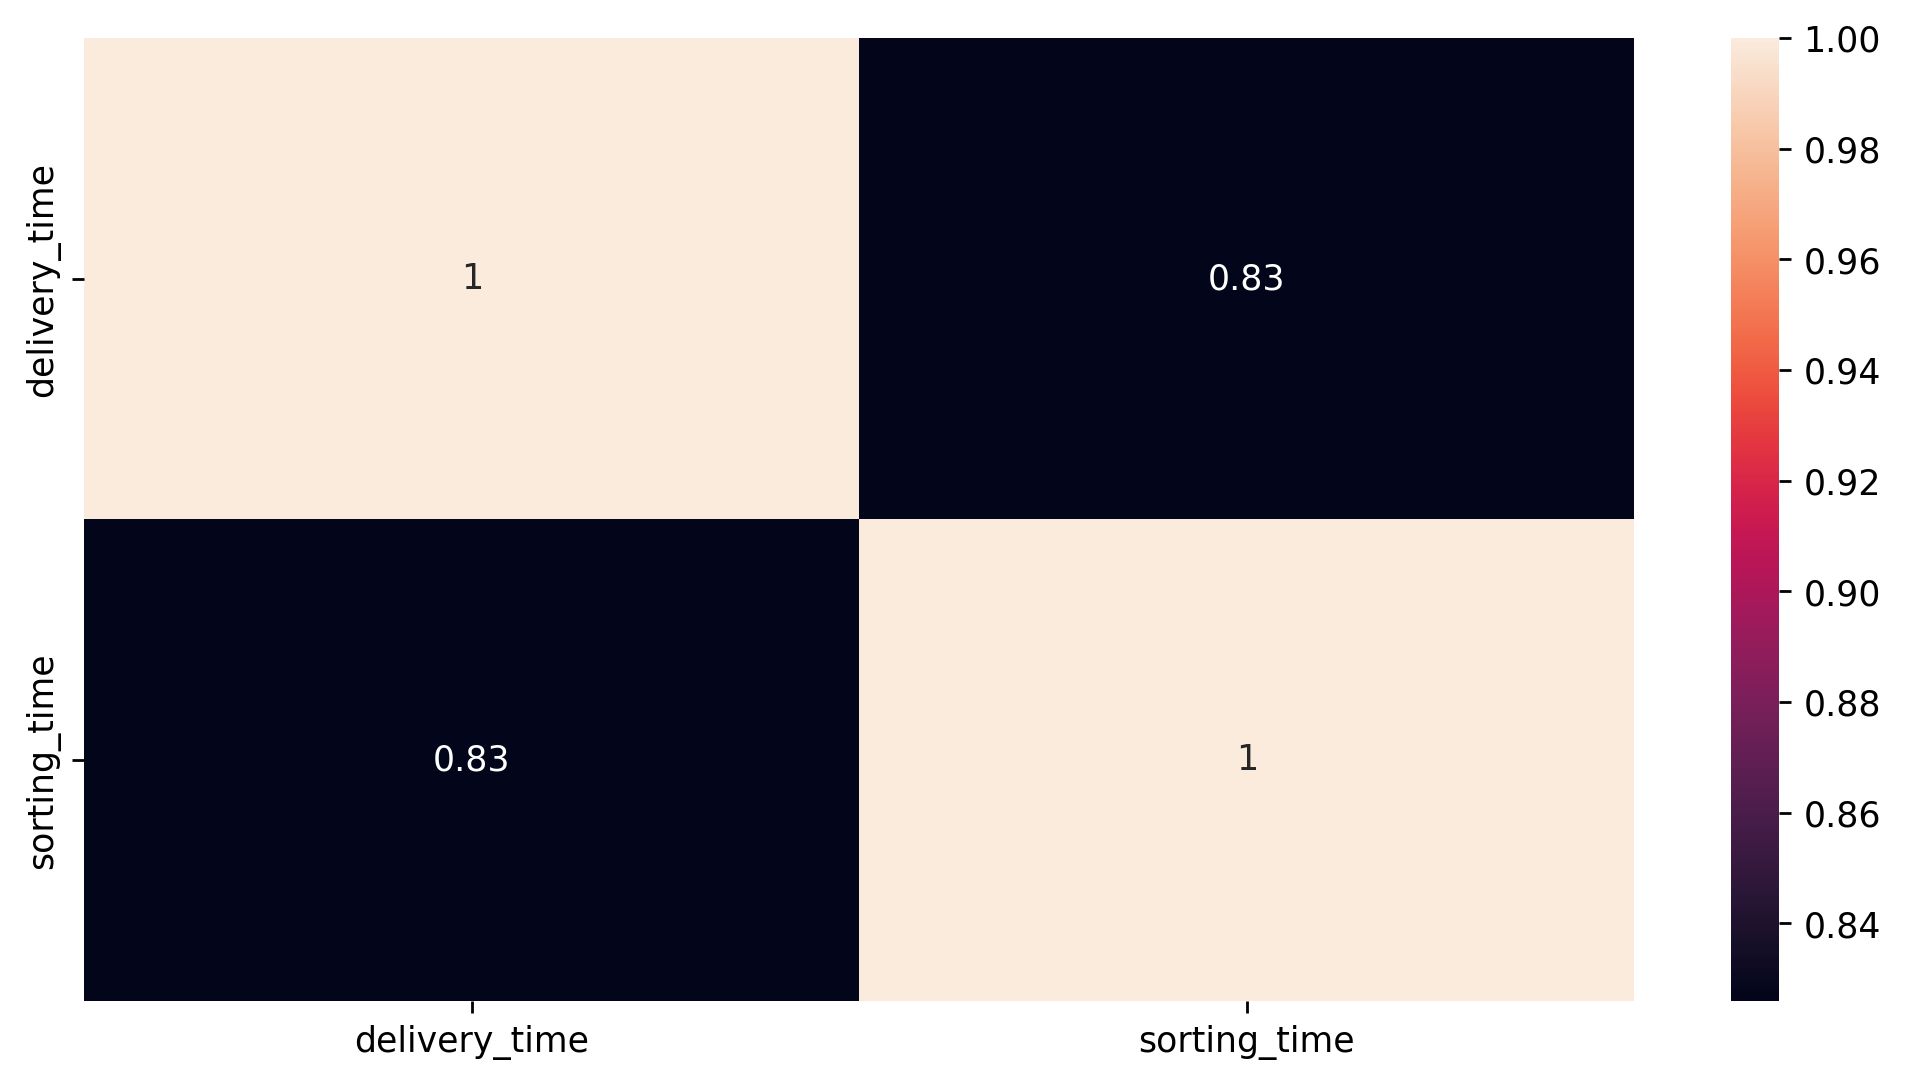

In [9]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

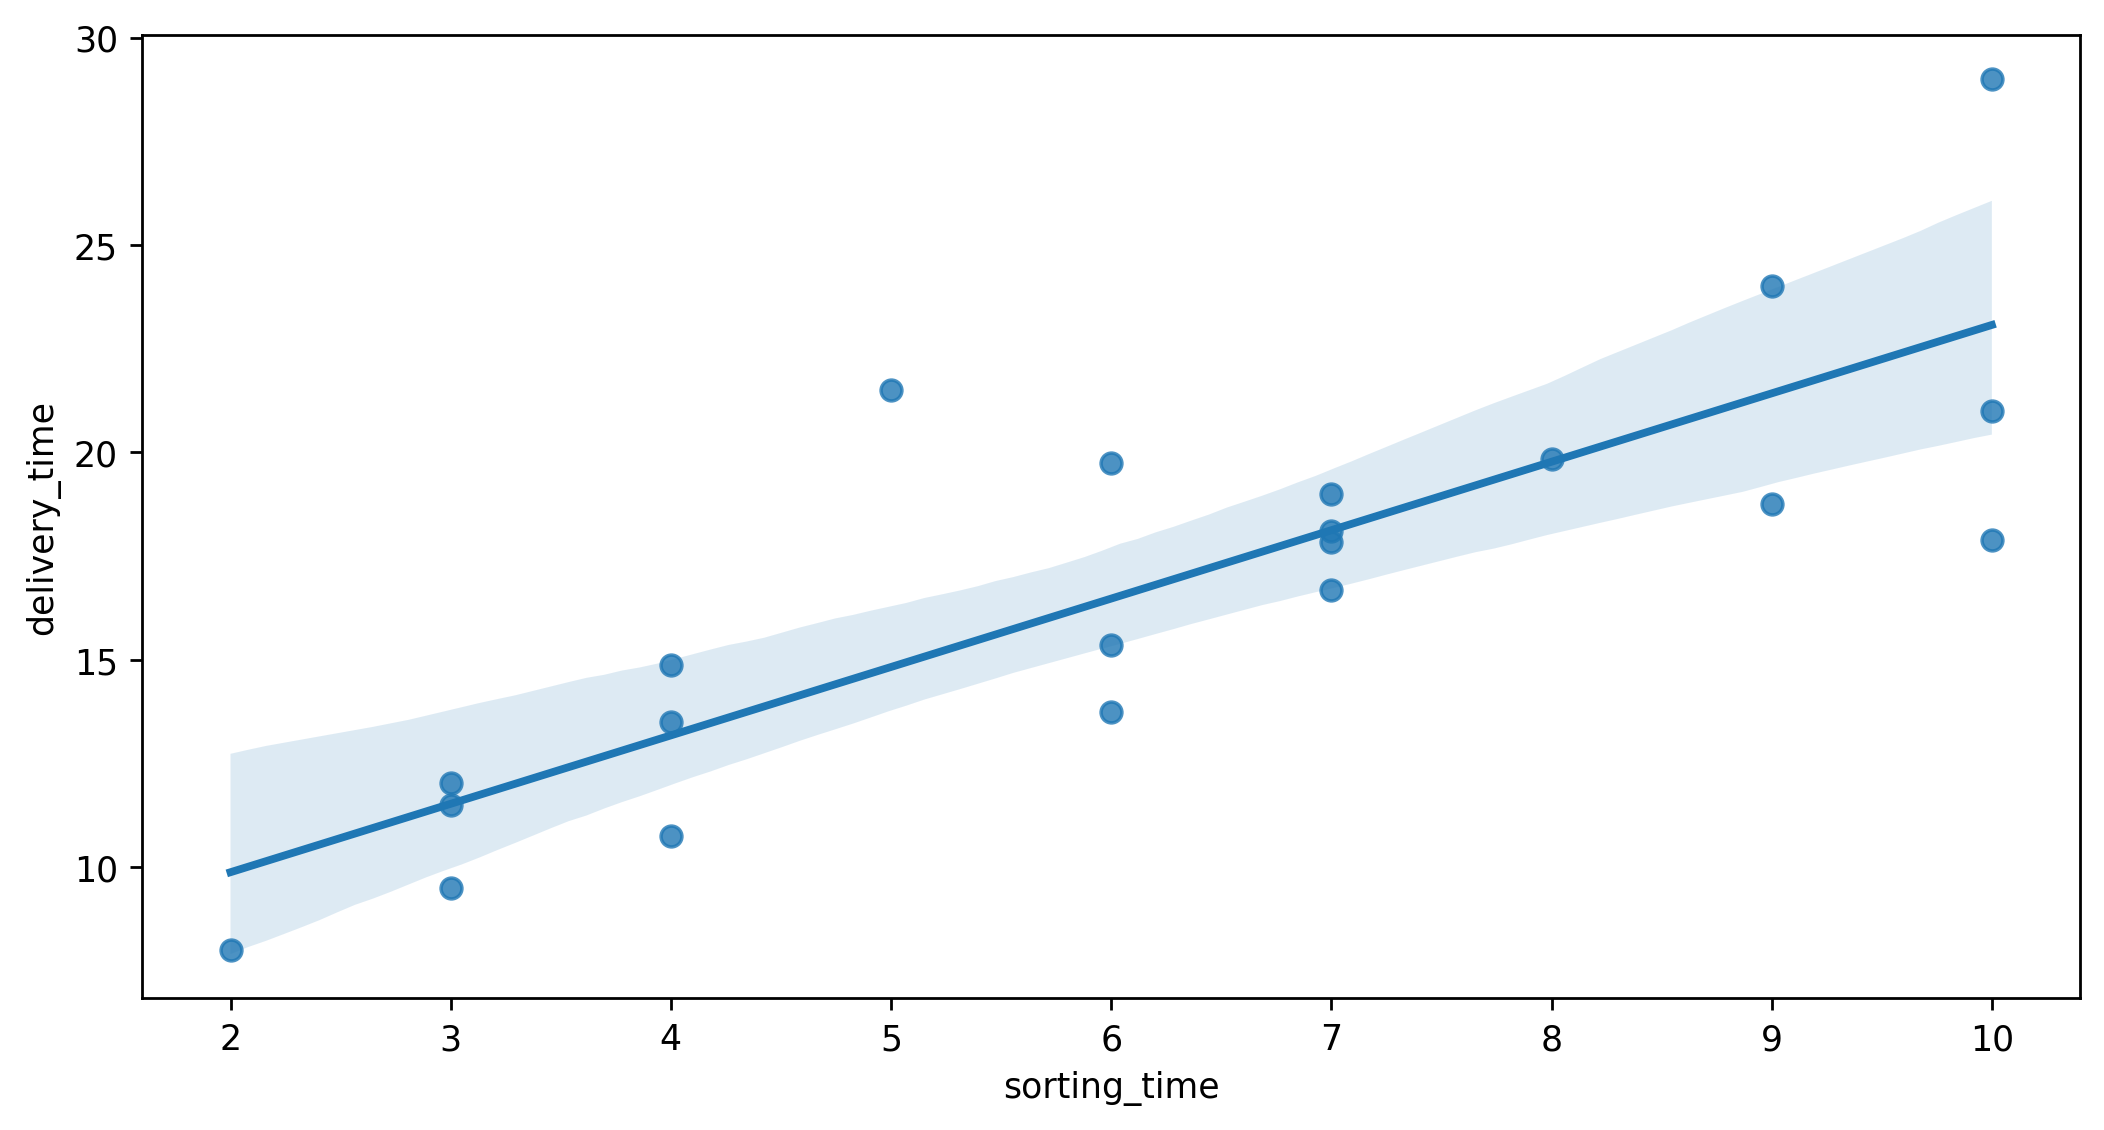

In [10]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

# Model Building

In [11]:
model=smf.ols("delivery_time~sorting_time",data=df).fit()

# Model Testing

In [12]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [14]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Prediction

In [15]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [16]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [17]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [18]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Data Transformation

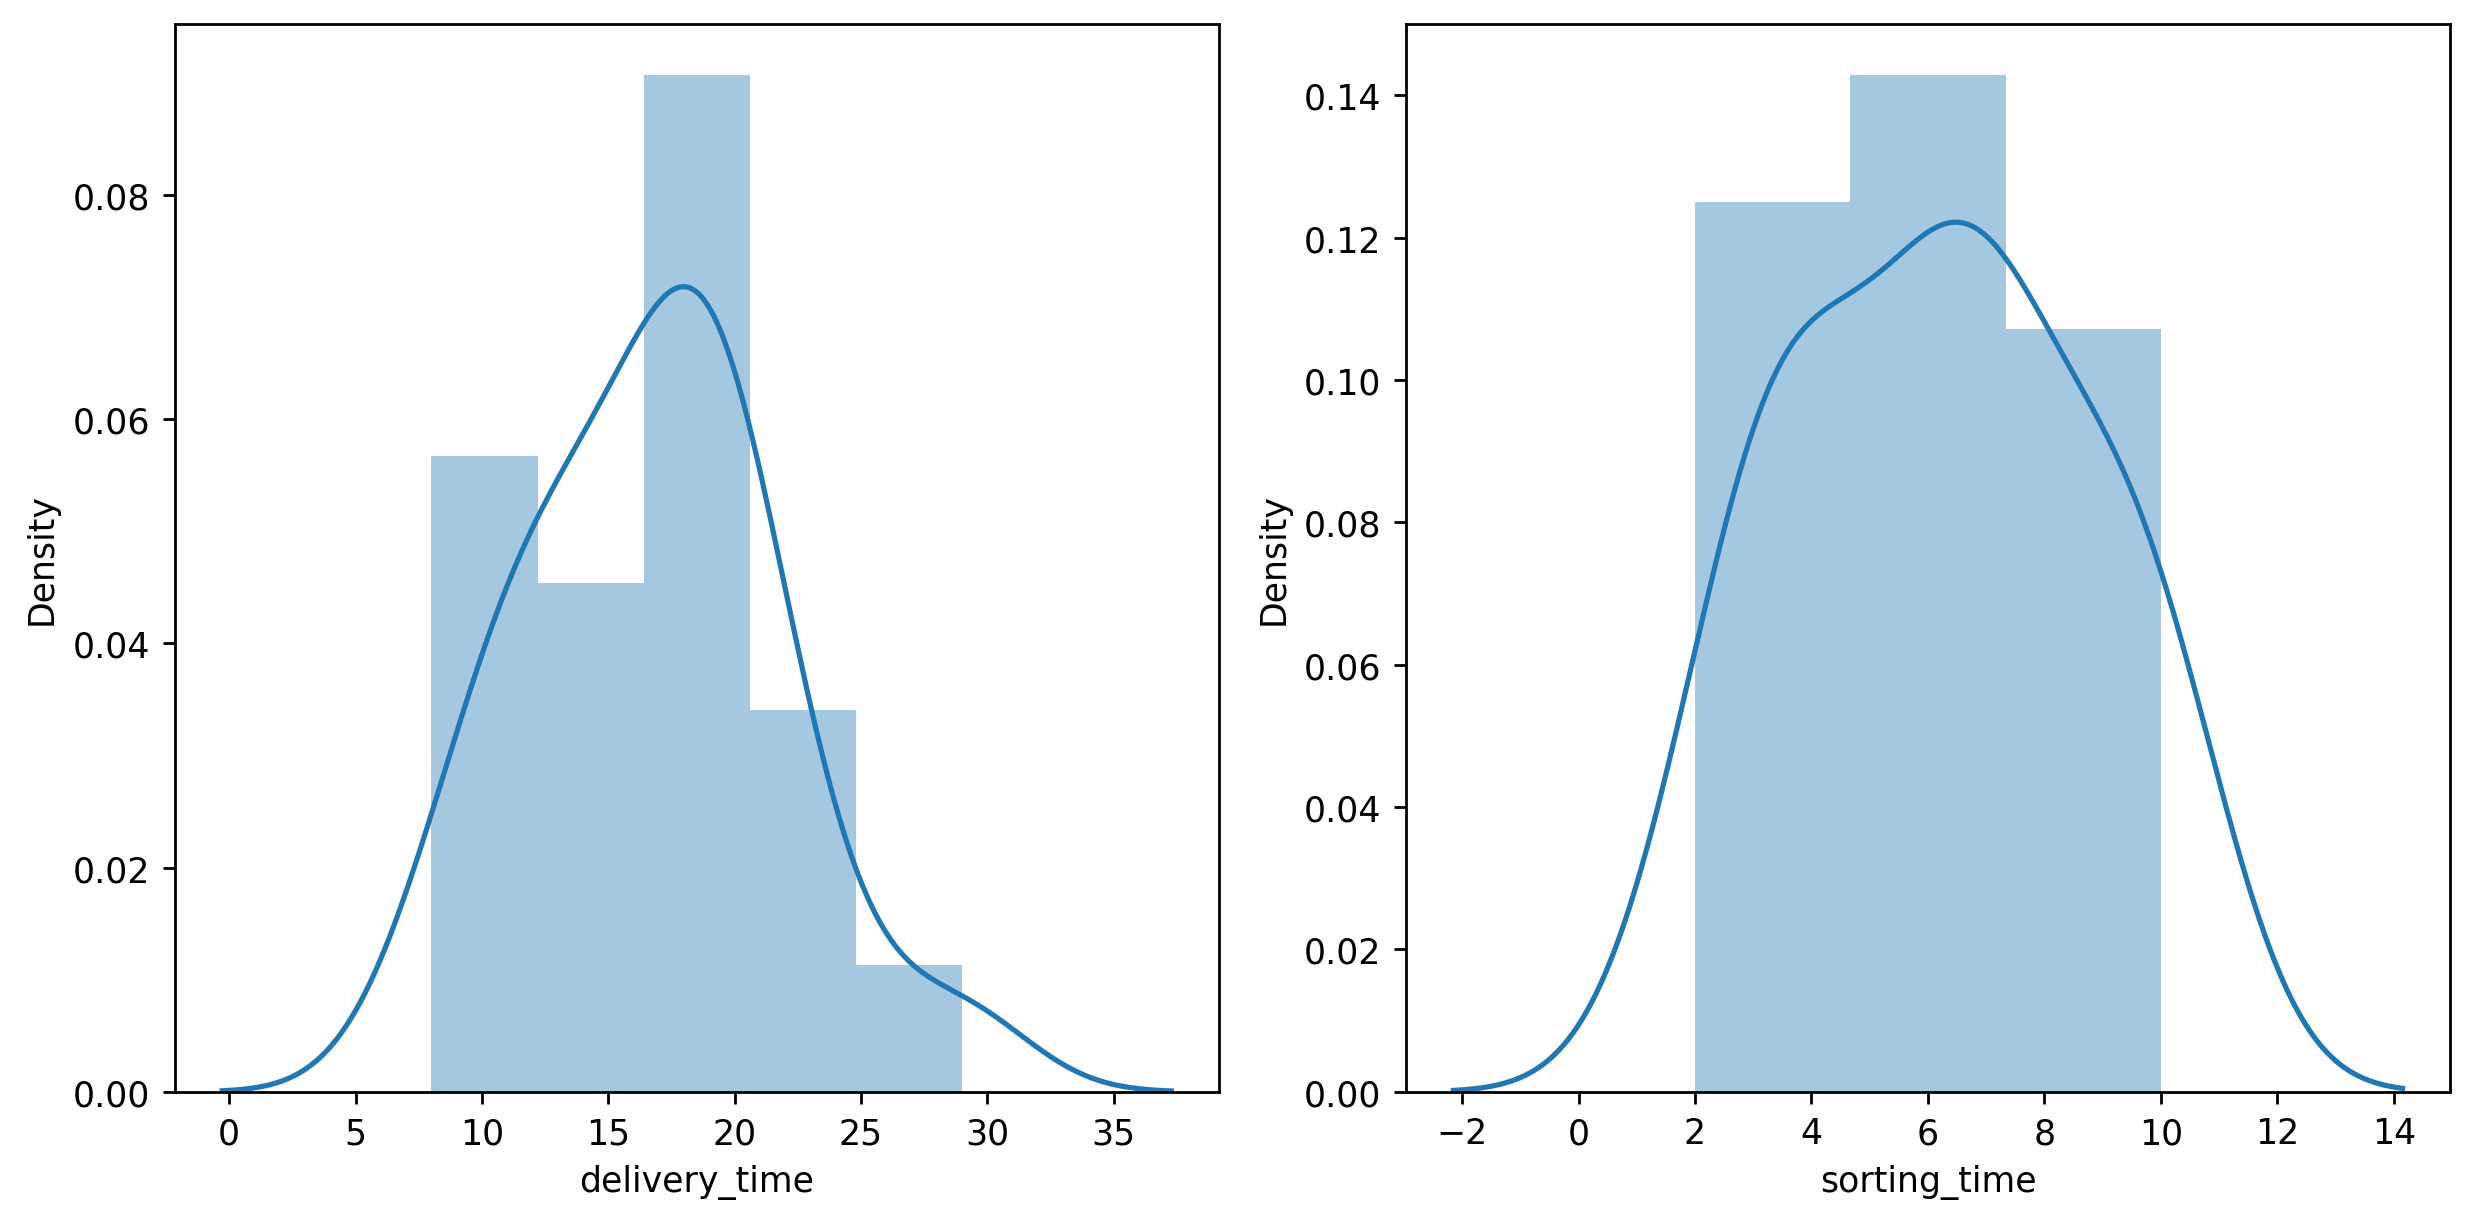

In [19]:
plt.subplot(1,2,1)
sns.distplot(df['delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['sorting_time'])
plt.tight_layout()

### Log Transformation

In [20]:
df['log_delivery_time'] = np.log(df['delivery_time'])
df.head()

,delivery_time,sorting_time,log_delivery_time
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


In [21]:
df['log_sorting_time'] = np.log(df['sorting_time'])
df.head()

,delivery_time,sorting_time,log_delivery_time,log_sorting_time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


<AxesSubplot:xlabel='log_sorting_time', ylabel='Density'>

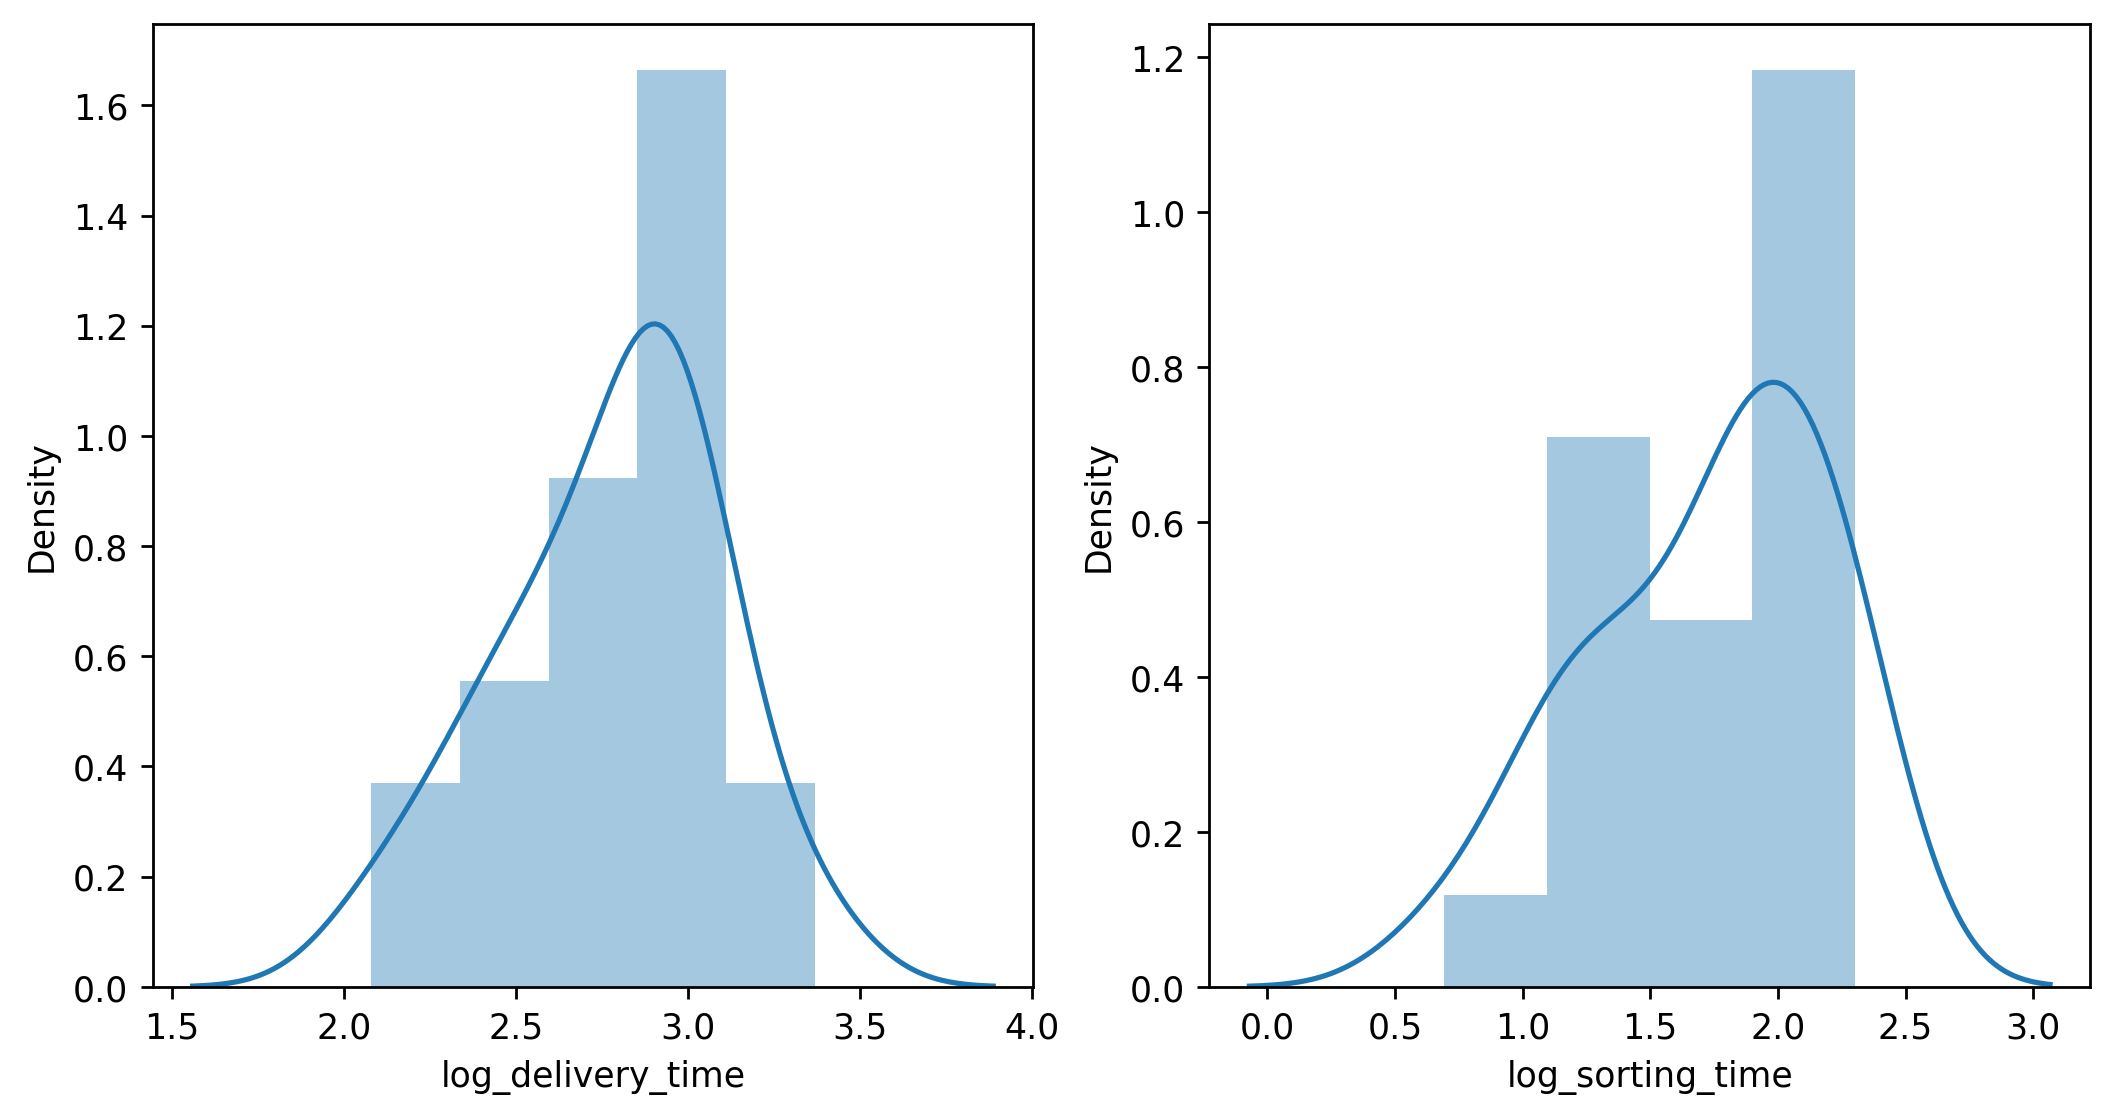

In [22]:
plt.subplot(1,2,1)
sns.distplot(df['log_delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['log_sorting_time'])

In [23]:
df['log_delivery_time'].skew()

-0.4512901148522999

### Sqrt Transformation

In [24]:
df['sqrt_sorting_time'] = np.sqrt(df['sorting_time'])
df.head()

,delivery_time,sorting_time,log_delivery_time,log_sorting_time,sqrt_sorting_time
0,21.00,10,3.044522,2.302585,3.162278
1,13.50,4,2.602690,1.386294,2.000000
2,19.75,6,2.983153,1.791759,2.449490
3,24.00,9,3.178054,2.197225,3.000000
4,29.00,10,3.367296,2.302585,3.162278


<AxesSubplot:xlabel='sqrt_sorting_time', ylabel='Density'>

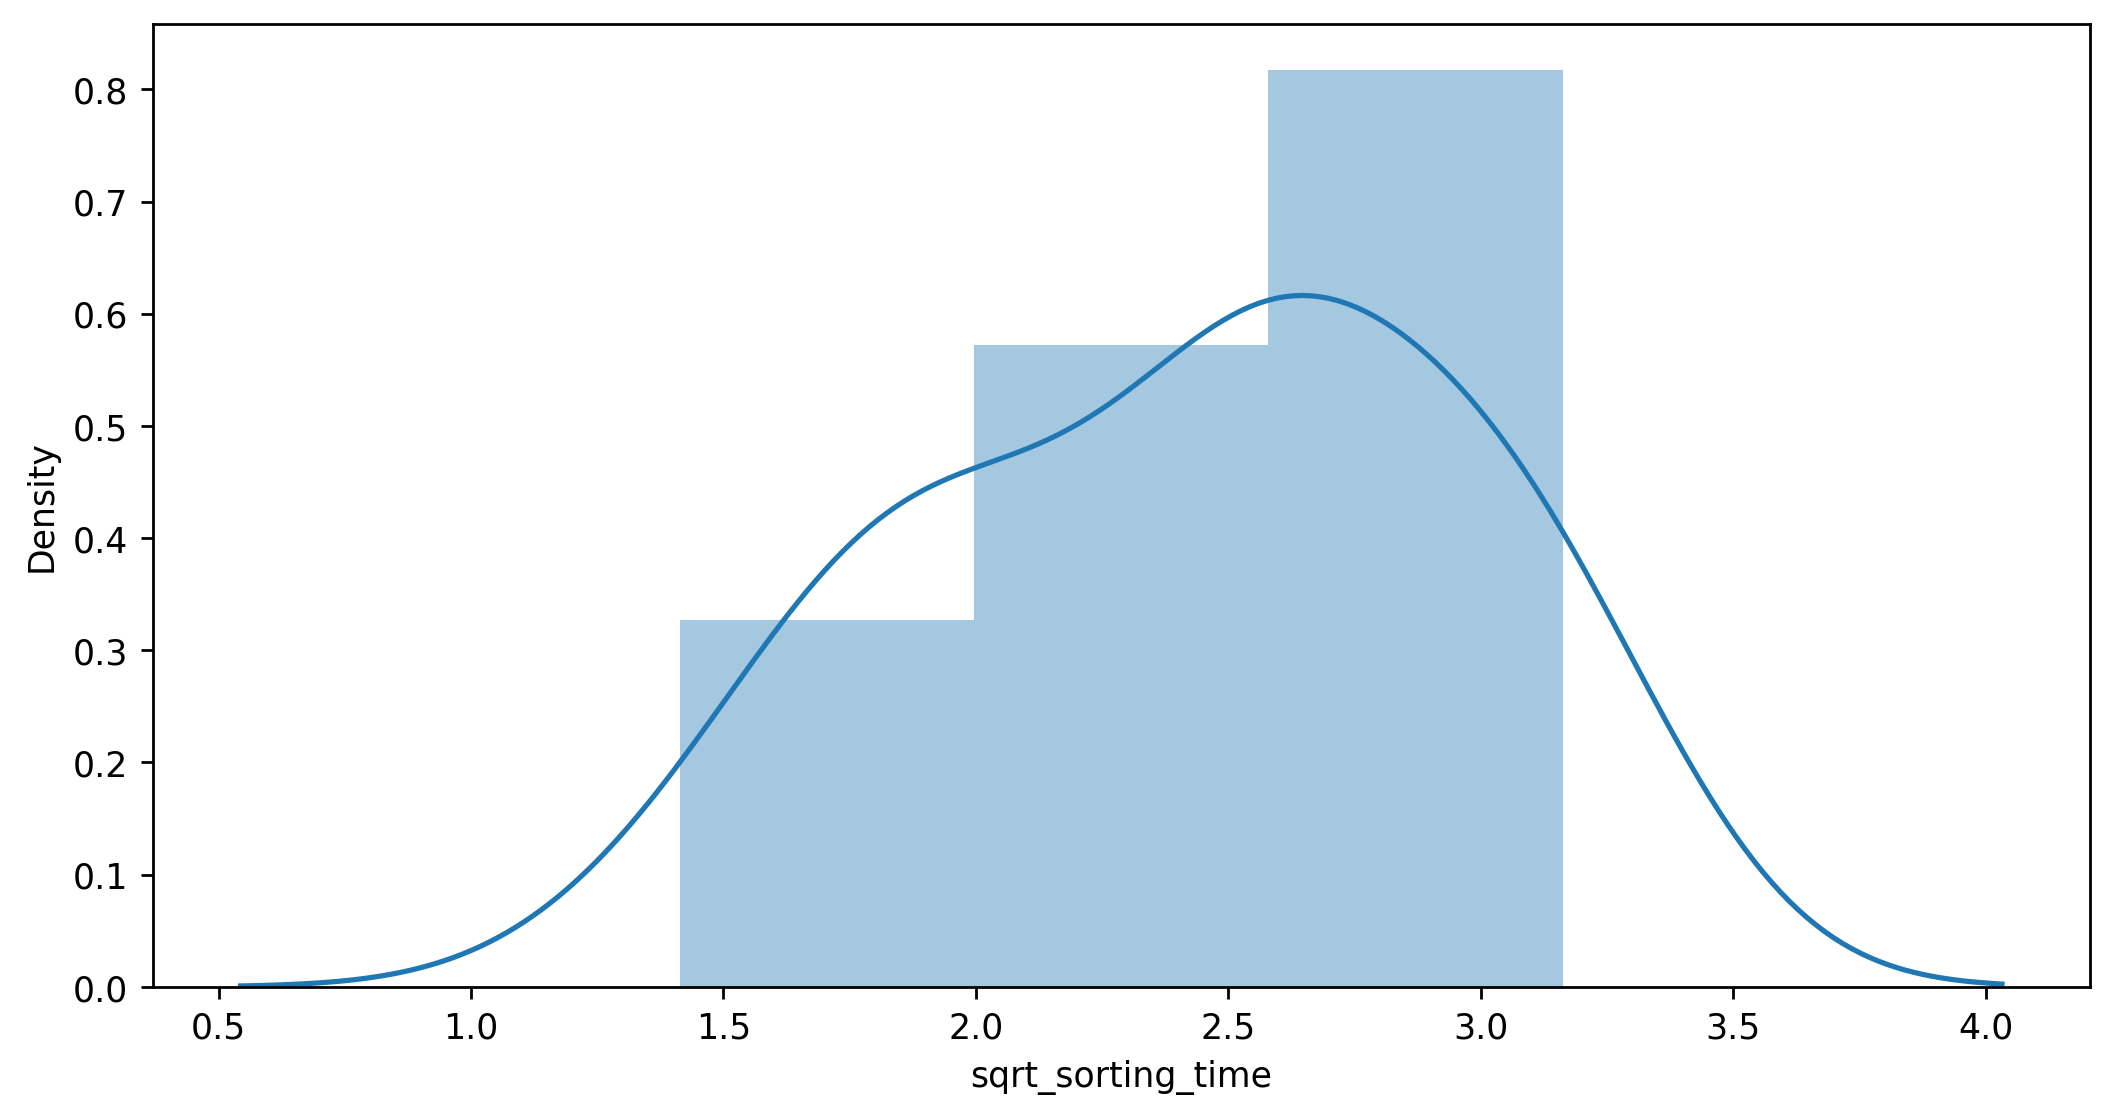

In [25]:
sns.distplot(df['sqrt_sorting_time'])

In [26]:
df['sqrt_sorting_time'].skew()

-0.25981634723613994